# Deep Learning入門

## 画像の正規化

In [8]:
import os

import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as keras
from IPython.display import SVG
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import cifar10, fashion_mnist
from tensorflow.keras.layers import (Activation, Add, BatchNormalization,
                                     Conv2D, Dense, Dropout, Flatten, Input,
                                     MaxPooling2D, add)
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.utils.vis_utils import model_to_dot

%matplotlib inline

random_state = 42

## もとの画像

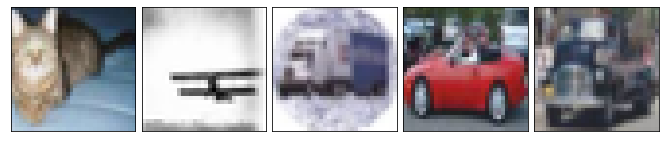

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
y_train = np.eye(10)[y_train.astype('int32').flatten()]

x_test = x_test.astype('float32') / 255
y_test = np.eye(10)[y_test.astype('int32').flatten()]

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=10000)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i])


# 可視化用に値のrangeを[0, 1]に修正
def normalize(x):
    max_x = np.max(x, axis=(0, 1), keepdims=True)
    min_x = np.min(x, axis=(0, 1), keepdims=True)
    return (x - min_x) / (max_x - min_x)

## 正規化: Global Contrast Normalization (GCN)

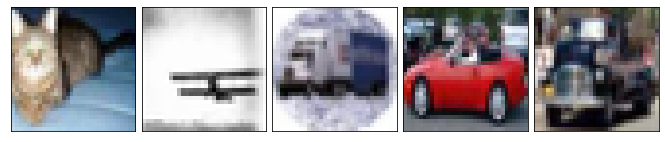

In [10]:
gcn_whitening = ImageDataGenerator(samplewise_center=True, samplewise_std_normalization=True)

gcn_whitening.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in gcn_whitening.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(normalize(x_batch[i]))
    break

## 正規化: Zero-phase Component Analysis (ZCA) Whitening

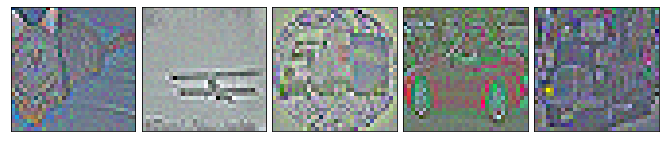

In [11]:
zca_whitening = ImageDataGenerator(zca_whitening=True)

zca_whitening.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in zca_whitening.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(normalize(x_batch[i]))
    break